# CMPE482 Spring 2021 - Assignment 3
## Ege Can KAYA - 2018400018
### Question 1

**a.** Using the code from the Python Language Companion to VMLS and applying the least-squares solution method using the QR factorization we saw in class:

In [198]:
import numpy as np
import matplotlib.pyplot as plt

D = house_sales_data() 

price = D['price']
area = D['area']
beds = D['beds']
condo = D['condo']
location = D['location']

tr_price = price[:600]
te_price = price[600:]



A = np.column_stack([np.ones(774), area, np.maximum(area-1.5,0), 
                     beds, condo, location==2, location==3, location==4])

tr_A = A[:600]
te_A = A[600:]

Q, R = np.linalg.qr(A[:600])

theta = np.linalg.solve(R, Q.T.dot(price[:600]))

print('theta = ', theta)

theta =  [ 112.84042349  161.51940759  -31.9684853   -13.26024458  -13.9593206
  -97.24789109 -102.62186246  -14.47469666]


**b.** We find the RMS values on the training set and the test set by calculating the respective residual vectors and calculating their RMS. We have as follows:

In [199]:
tr_residual = (tr_price - A[:600].dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set is ', tr_rms)
tr_rms0 = tr_rms

te_residual = (te_price - A[600:].dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set is ', te_rms)
te_rms0 = te_rms

RMS on the training set is  67.88838459483728
RMS on the test set is  70.36419961990217


**c.** To get a preliminary visual idea about the usefulness of the basis function $f_3$, we can create a stem plot for $\hat{\theta}$ and check the value of the coefficient $\hat{\theta}_3$ in relation to the other coefficients:

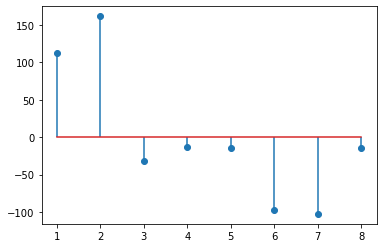

In [200]:
plt.stem(list(range(1, 9)), theta)
plt.show()

We can graphically see that $\hat{\theta}_3$ appears to be less significant than some of the other coefficients and more significant than some others, however this is clearly not grounds for a conclusion. We now remove $f_3$ from our basis and carry out the same calculations:

In [201]:
B = np.column_stack([np.ones(774), area, 
                     beds, condo, location==2, location==3, location==4])

Q_p, R_p = np.linalg.qr(B[:600])

theta_p = np.linalg.solve(R_p, Q_p.T.dot(tr_price))

print('theta\' = ', theta_p)

tr_residual_p = (tr_price - B[:600].dot(theta_p))
tr_rms_p = np.sqrt((tr_residual_p ** 2).sum() / 600)
print('New RMS on the training set is ', tr_rms_p)

te_residual_p = (te_price - B[600:].dot(theta_p))
te_rms_p = np.sqrt((te_residual_p ** 2).sum() / 174)
print('New RMS on the test set is ', te_rms_p)
print()
print('Ratio of original test RMS to training RMS is ', te_rms0 / tr_rms0)
print('Ratio of new test RMS to training RMS is ', te_rms_p / tr_rms_p)

theta' =  [ 139.24187905  135.11686268  -10.89543447  -18.49737516  -98.18633863
 -103.63029527  -13.50072281]
New RMS on the training set is  68.05912603229082
New RMS on the test set is  71.00134435600773

Ratio of original test RMS to training RMS is  1.0364689046563818
Ratio of new test RMS to training RMS is  1.0432303277347548


As we can see, removing $f_3$ from the basis has increased our RMS error, albeit only by a marginally small amount. More importantly in terms of generalization, removing $f_3$ has also marginally increased the difference between our training RMS and our test RMS. Therefore, in terms of generalization, it might be a smarter idea to keep $f_3$.

### Question 2

**a.** As described in Section 15.3.1 of VMLS, we calculate the Tikhonov regularized approximate solution as follows, again using the facilities of QR factorization:


In [202]:
lamb = .00001
theta1 = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)


lamb = 100000
theta2 = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)


print('theta1 = ', theta1)
print('theta2 = ', theta2)

theta1 =  [ 112.84025841  161.51935426  -31.96843722  -13.2602259   -13.95931409
  -97.24771278 -102.62168378  -14.47451183]
theta2 =  [1.23456241 2.25297387 0.55813216 4.22341999 0.04239402 0.51788587
 0.53015913 0.13459842]


Clearly, $\hat{\theta}_1$ is much closer to the original $\hat{\theta}$ we found in Q1, whereas $\hat{\theta}_2$ is full of values closer to 0. This is caused by the $\lambda$ value being too high. In order to negate the effect of the high $\lambda$ value, the solution takes us towards a  much smaller $\hat{\theta}$, because minimizing the second term of the Tikhonov expression becomes more important than the least squares portion of the problem.

**b.** We calculate the RMS errors for both the training and test sets for various values of $\lambda$. Note that $\lambda = 0$ gives us the regular least squares problem we resolved in the previous question:

In [203]:
# lambda = 0

print('RMS on the training set with lambda = 0 is ', tr_rms0)
print('RMS on the test set with lambda = 0 is ', te_rms0)
print('Ratio of test RMS to training RMS is ', te_rms0 / tr_rms0)
print()

lamb = .001
theta = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)
tr_residual = (tr_price - tr_A.dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set with lambda = .001 is ', tr_rms)
te_residual = (te_price - te_A.dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set with lambda = .001 is ', te_rms)
print('Ratio of test RMS to training RMS is ', te_rms / tr_rms)
print()

lamb = .01
theta = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)
tr_residual = (tr_price - tr_A.dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set with lambda = .01 is ', tr_rms)
te_residual = (te_price - te_A.dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set with lambda = .01 is ', te_rms)
print('Ratio of test RMS to training RMS is ', te_rms / tr_rms)
print()

lamb = .1
theta = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)
tr_residual = (tr_price - tr_A.dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set with lambda = .1 is ', tr_rms)
te_residual = (te_price - te_A.dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set with lambda = .1 is ', te_rms)
print('Ratio of test RMS to training RMS is ', te_rms / tr_rms)
print()

lamb = 1
theta = np.linalg.inv(R.T.dot(R)+lamb*np.eye(R.shape[0])).dot(R.T.dot(Q.T)).dot(tr_price)
tr_residual = (tr_price - tr_A.dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set with lambda = 1 is ', tr_rms)
te_residual = (te_price - te_A.dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set with lambda = 1 is ', te_rms)
print('Ratio of test RMS to training RMS is ', te_rms / tr_rms)

RMS on the training set with lambda = 0 is  67.88838459483728
RMS on the test set with lambda = 0 is  70.36419961990217
Ratio of test RMS to training RMS is  1.0364689046563818

RMS on the training set with lambda = .001 is  67.88838467762417
RMS on the test set with lambda = .001 is  70.36467635960452
Ratio of test RMS to training RMS is  1.0364759257970166

RMS on the training set with lambda = .01 is  67.88839284475874
RMS on the test set with lambda = .01 is  70.3689714763863
Ratio of test RMS to training RMS is  1.0365390684280882

RMS on the training set with lambda = .1 is  67.88918173853497
RMS on the test set with lambda = .1 is  70.41233216484864
Ratio of test RMS to training RMS is  1.037165721573007

RMS on the training set with lambda = 1 is  67.94722661260717
RMS on the test set with lambda = 1 is  70.86432842702094
Ratio of test RMS to training RMS is  1.0429318746303697


These results show that, only in terms of the generalization ability, the value $\lambda=0$ has the highest performance, since it results in the lowest difference between the training RMS and the test RMS. Therefore, I choose $\lambda=0$.

### Question 3
**a.** We have:

In [204]:
A_n = np.column_stack([np.ones(774), area, np.maximum(area-1.5,0), 
                     beds, condo, location==2, location==3, 
                     location==4, area**2, area*np.maximum(area-1.5,0),
                    area*beds, area*condo, area*(location==2),
                    area*(location==3), area*(location==4),
                    np.maximum(area-1.5,0)**2,
                    np.maximum(area-1.5,0)*beds,
                    np.maximum(area-1.5,0)*condo,
                    np.maximum(area-1.5,0)*(location==2),
                    np.maximum(area-1.5,0)*(location==3),
                    np.maximum(area-1.5,0)*(location==4),
                    beds**2, beds*condo, beds*(location==2),
                    beds*(location==3), beds*(location==4),
                    condo**2,
                    condo*(location==2), condo*(location==3),
                    condo*(location==4), (location==2)**2,
                    (location==2)*(location==3),
                    (location==2)*(location==4),
                    (location==3)**2,
                    (location==3)*(location==4), (location==4)**2])

**b.** Again, as in Q2 we deal with the Tikhonov problem:

In [205]:
tr_A_n = A_n[:600]
te_A_n = A_n[600:]
Q_n, R_n = np.linalg.qr(tr_A_n)

lamb = .1
theta = np.linalg.inv(R_n.T.dot(R_n)+lamb*np.eye(R_n.shape[0])).dot(R_n.T.dot(Q_n.T)).dot(tr_price)
tr_residual = (tr_price - tr_A_n.dot(theta))
tr_rms = np.sqrt((tr_residual ** 2).sum() / 600)
print('RMS on the training set with lambda = .1 is ', tr_rms)
te_residual = (te_price - te_A_n.dot(theta))
te_rms = np.sqrt((te_residual ** 2).sum() / 174)
print('RMS on the test set with lambda = .1 is ', te_rms)
print('Ratio of test RMS to training RMS is ', te_rms / tr_rms)
print()

RMS on the training set with lambda = .1 is  65.36122919067375
RMS on the test set with lambda = .1 is  72.1138618113308
Ratio of test RMS to training RMS is  1.103312509637144



Again, this change has increased the difference between our training RMS and our test RMS, which shows that it is a bad idea in terms of generalization.

**c.** When we use our method on a set of 30 observations, visually we get the following image in terms of dimensions: 

$$ \begin{bmatrix}
 &  &  &  \\
 &  A  &\\
 &  &  &
\end{bmatrix} \begin{bmatrix}
 &\\
 \theta& \\
 &
\end{bmatrix} = \begin{bmatrix}
 &\\
 y\\
 &
\end{bmatrix} \\ 
\; \; 30\times 36 \; \; \; 36\times 1 \; \; \; \; \; 30\times 1 \\ $$

Notice that $A$ becomes a wide matrix of dimension $30\times 36$. Now, according to Section 15.3.1 of VMLS, the stacked matrix $\begin{bmatrix}
 A\\
\sqrt{\lambda}
\end{bmatrix} $ used in the solution of the Tikhonov problem always has linearly independent columns, regardless of the dimensions and nature of $A$, and for any $\lambda > 0$, can be inverted, which allows us to find a solution to the Tikhonov problem. 

However, problems do arise for this setup when $\lambda = 0$. Notice that in this case, our objective function reduces to the regular least squares problem, but involving an underdetermined matrix. In this case, under the assumption that A has linearly independent columns, (thus, that $AA^T$ is invertible), we can use the Moore-Penrose pseudoinverse to find a least squares solution as follows: $\hat{\theta} = A^T(AA^T)^{-1}y$.

### Question 4

**a.**

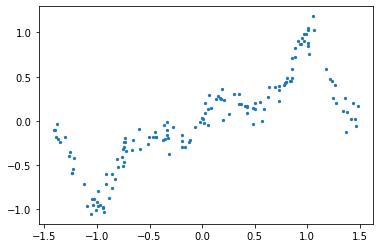

In [206]:
N = 150

x = 3*np.random.rand(N) - 1.5
x.sort()

m1 = x[x<-.5].shape[0]
mi = x[x<.5].shape[0]
m2 = mi - m1
m3 = N - mi

epsilon = 0.1*np.random.randn(N)

y = x*(np.exp(-x**2+np.cos(6*x)))+epsilon

plt.scatter(x, y, s=5)
plt.show()

**b.** We have the following polynomials to fit our data:

$$ p_1(x) = c_0 +c_1x+c_2x^2+c_3x^3+c_4x^4 \\
p_2(x) = c_5 +c_6x+c_7x^2+c_8x^3+c_9x^4 \\
p_3(x) = c_{10} +c_{11}x+c_{12}x^2+c_{13}x^3+c_{14}x^4 $$

For the continuity conditions, we require that:

$$ p_1(-0.5)=p_2(-0.5) \\
p_2(0.5)=p_3(0.5) \\
p_1'(-0.5)=p_2'(-0.5) \\
p_2'(0.5)=p_3'(0.5) \\
p_1''(-0.5)=p_2''(-0.5) \\
p_2''(0.5)=p_3''(0.5) \\ $$

Now, stating the problem as an optimization problem of the form
$$\text{minimize } \|A\mathbf{c} -\mathbf{y}\|^2 \\
\text{subject to } C\mathbf{c} = \mathbf{d} \\ $$

Where the values of $A$, $C$ and $d$ will be given below, in section **c.**:

**c.**

In [207]:
P1 = np.hstack((np.column_stack([np.ones(m1), x[:m1], x[:m1]**2, x[:m1]**3, x[:m1]**4]), np.zeros([m1, 10])))
P2 = np.hstack((np.zeros([m2, 5]), np.column_stack([np.ones(m2), x[m1:mi], x[m1:mi]**2, x[m1:mi]**3, x[m1:mi]**4]), np.zeros([m2, 5])))
P3 = np.hstack((np.zeros([m3, 10]), np.column_stack([np.ones(m3), x[mi:N], x[mi:N]**2, x[mi:N]**3, x[mi:N]**4])))

A = np.vstack((P1, P2, P3))

C = np.array([[1, (-.5), (-.5)**2, (-.5)**3, (-.5)**4, -1, -(-.5), -(-.5)**2, -(-.5)**3, -(-.5)**4, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, (.5), (.5)**2, (.5)**3, (.5)**4, -1, -(.5), -(.5)**2, -(.5)**3, -(.5)**4],
    [0, 1, 2*(-.5), 3*(-.5)**2, 4*(-.5)**3, 0, -1, -2*(-.5), -3*(-.5)**2, -4*(-.5)**3, 0, 0, 0, 0, 0 ],
    [0, 0, 0, 0, 0, 0, 1, 2*(.5), 3*(.5)**2, 4*(.5)**3, 0, -1, -2*(.5), -3*(.5)**2, -4*(.5)**3],
    [0, 0, 2, 6*(-.5), 12*(-.5)**2, 0, 0, -2, -6*(-.5), -12*(-.5)**2, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 2, 6*(.5), 12*(.5)**2, 0, 0, -2, -6*(.5), -12*(.5)**2]])

d = np.zeros([6, 1])

print('A = ', A)
print()
print('C = ', C)
print()
print('d = ', d)


A =  [[ 1.         -1.41151294  1.99236877 ...  0.          0.
   0.        ]
 [ 1.         -1.404715    1.97322424 ...  0.          0.
   0.        ]
 [ 1.         -1.39507657  1.94623863 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.11655692  3.07924986
   4.47981321]
 [ 0.          0.          0.         ...  2.14478326  3.14105193
   4.60009523]
 [ 0.          0.          0.         ...  2.20924101  3.28370885
   4.88074583]]

C =  [[ 1.     -0.5     0.25   -0.125   0.0625 -1.      0.5    -0.25    0.125
  -0.0625  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.5     0.25    0.125
   0.0625 -1.     -0.5    -0.25   -0.125  -0.0625]
 [ 0.      1.     -1.      0.75   -0.5     0.     -1.      1.     -0.75
   0.5     0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      1.      0.75
   0.5     0.     -1.     -1.     -0.75   -0.5   ]
 [ 0.      0.      2.     -

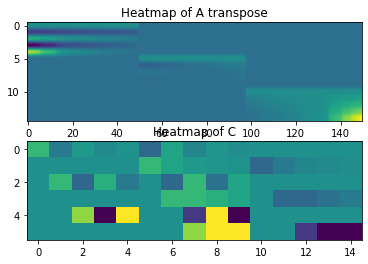

In [208]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.imshow(A.T, aspect='auto')
ax1.set_title('Heatmap of A transpose')

ax2.imshow(C, aspect='auto')
ax2.set_title('Heatmap of C')

plt.show()

**d.** Using Algorithm 16.2 from VMLS:

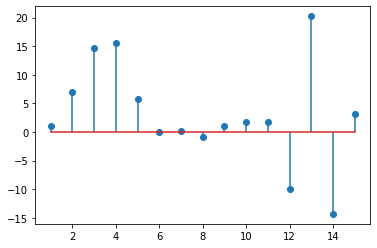

In [209]:
S = np.vstack((A, C))

Q, R = np.linalg.qr(S)
Q1 = Q[:150]
Q2 = Q[150:]

Qtilde, Rtilde = np.linalg.qr(Q2.T)


chi = np.linalg.solve(Rtilde.T, d)


RHS = 2*Qtilde.T.dot(Q1.T).dot(y.reshape((150, 1)))-2*chi

w = np.linalg.solve(Rtilde, RHS)


RHS_p = Q1.T.dot(y.reshape(150,1)) - .5*Q2.T.dot(w)

c = np.linalg.solve(R, RHS_p)

plt.stem(list(range(1, 16)), c)
plt.show()

**e.** We multiply our result with the basis $A$ and we get our piecewise polynomial fit:

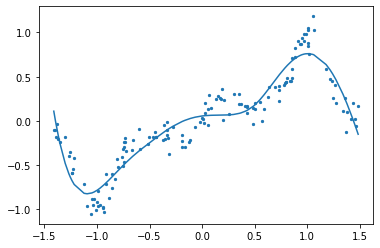

In [210]:
fhat = A.dot(c)

plt.scatter(x, y, s=5)
plt.plot(x, fhat)
plt.show()

**f.** We construct the  given stacked matrix and compute:

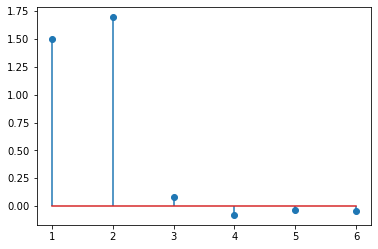

In [211]:
UL = 2*A.T.dot(A)

U = np.hstack((UL, C.T))
L = np.hstack((C, np.zeros([6, 6])))

ST = np.vstack((U, L))
RHST = np.vstack((2*A.T.dot(y.reshape(150,1)), d))

cz = np.linalg.solve(ST, RHST)

z = cz[15:]

plt.stem(list(range(1, 7)), z)
plt.show()

Also, by checking whether the first 15 elements of the stacked vector of our solution is indeed equal to $c$, we can be sure that the KKT conditions are satisfied. We perform and verify this as follows:

In [212]:
print(np.allclose(cz[:15], c))

True


**g.** For feasibility, the conditions expressed by $Cc = d$ must hold. I would guess that since we have a feasible solution for $D=4$, we would also have feasible solutions for any nonnegative $D$ less than $4$. Therefore, we would have feasible solutions for the cases where $D \in \{0, 1, 2, 3\}$.

In [213]:
def house_sales_data():
    # 774 House sales in Sacramento area.
    # Column 1: region (1--4) based on 5-digit ZIP code (see Table 13.4.)
    # Column 2: number of bedrooms.
    # Column 3: number of bathrooms.
    # Column 4: house area in square feet.
    # Column 5: 1 if a condo, 0 otherwise.
    # Column 6: selling price in dollars.
    """
        house_sales_data()
    Returns a dictionary `D` with the Sacramento house sales data
    used in section 2.3 and chapter 13.  
    The 6 items in the dictionary are vectors of length 774, with data for 
    774 house sales.
    * `D["price"]`:    selling price in 1000 dollars
    * `D["area"]`:     area in 1000 square feet
    * `D["beds"]`:     number of bedrooms
    * `D["baths"]`:    number of bathrooms
    * `D["condo"]`:    1 if a condo, 0 otherwise 
    * `D["location"]`: an integer between 1 and 4 indicating the location.
    """
    import numpy as np
    X = np.array([[ 2,   2,   2,    941,   1,     94905],
         [ 2,   3,   2,   1146,   0,     98937],
         [ 2,   3,   2,    909,   0,    100309],
         [ 3,   3,   2,   1289,   0,    106250],
         [ 3,   3,   1,   1020,   0,    107502],
         [ 2,   2,   2,   1022,   0,    108750],
         [ 2,   2,   2,   1134,   1,    110700],
         [ 2,   2,   1,    844,   0,    113263],
         [ 2,   2,   1,    795,   1,    116250],
         [ 2,   2,   1,    588,   0,    120000],
         [ 2,   3,   2,   1356,   0,    121630],
         [ 2,   3,   2,   1118,   0,    122000],
         [ 3,   4,   2,   1329,   0,    122682],
         [ 2,   4,   2,   1240,   0,    123000],
         [ 2,   3,   2,   1601,   0,    124100],
         [ 2,   3,   2,    901,   0,    125000],
         [ 2,   3,   2,   1088,   0,    126640],
         [ 3,   3,   1,    963,   0,    127281],
         [ 3,   3,   2,   1119,   0,    129000],
         [ 2,   4,   2,   1380,   0,    131200],
         [ 3,   3,   2,   1248,   0,    132000],
         [ 3,   2,   2,   1039,   1,    133000],
         [ 2,   3,   2,   1152,   0,    134555],
         [ 2,   3,   2,   1380,   0,    136500],
         [ 2,   3,   2,   1116,   0,    138750],
         [ 3,   2,   2,   1039,   1,    141000],
         [ 3,   3,   2,   1418,   0,    146250],
         [ 2,   3,   2,   1082,   0,    147308],
         [ 3,   4,   2,   1472,   0,    148750],
         [ 3,   4,   2,   1146,   0,    149593],
         [ 2,   1,   1,    760,   1,    150000],
         [ 2,   2,   2,   1304,   1,    152000],
         [ 3,   3,   2,   1207,   0,    154000],
         [ 3,   3,   2,   1056,   0,    156896],
         [ 2,   2,   2,   1043,   0,    161250],
         [ 2,   4,   2,   1587,   0,    161500],
         [ 2,   4,   1,   1120,   0,    164000],
         [ 3,   4,   2,   1580,   0,    165000],
         [ 3,   4,   1,   1955,   0,    166357],
         [ 2,   4,   2,   1656,   0,    166357],
         [ 3,   3,   2,   1477,   0,    168000],
         [ 3,   3,   2,   1188,   0,    170000],
         [ 3,   4,   2,   1590,   0,    173000],
         [ 3,   3,   2,   1463,   0,    174250],
         [ 3,   4,   2,   1714,   0,    174313],
         [ 3,   3,   2,   1185,   0,    178480],
         [ 3,   3,   2,   1406,   0,    178760],
         [ 3,   3,   2,   1172,   0,    181000],
         [ 2,   3,   1,   1152,   0,    181872],
         [ 3,   4,   3,   1851,   0,    182587],
         [ 2,   3,   2,   1215,   0,    182716],
         [ 3,   3,   2,   1130,   0,    182750],
         [ 2,   4,   2,   1603,   0,    183200],
         [ 3,   3,   1,   1479,   0,    188741],
         [ 3,   3,   2,   1420,   0,    189000],
         [ 3,   3,   2,   1280,   0,    192067],
         [ 3,   3,   2,   1586,   0,    194000],
         [ 2,   3,   2,   1362,   0,    194818],
         [ 3,   3,   2,   1266,   0,    198000],
         [ 3,   4,   2,   1715,   0,    199500],
         [ 4,   3,   2,   1820,   0,    200000],
         [ 2,   3,   1,    936,   0,    200000],
         [ 2,   3,   2,   1511,   0,    208000],
         [ 3,   4,   2,   1590,   0,    212864],
         [ 3,   4,   2,   1596,   0,    221000],
         [ 2,   2,   2,   1341,   0,    221000],
         [ 3,   5,   3,   2136,   0,    223058],
         [ 3,   4,   2,   1616,   0,    227887],
         [ 3,   3,   2,   1478,   0,    231477],
         [ 2,   3,   2,   1287,   0,    234697],
         [ 2,   4,   2,   1277,   0,    235000],
         [ 2,   4,   2,   1448,   0,    236000],
         [ 3,   4,   3,   2235,   0,    236685],
         [ 2,   3,   2,   2093,   0,    237800],
         [ 2,   3,   2,   1193,   0,    240122],
         [ 3,   3,   2,   2163,   0,    242638],
         [ 3,   3,   2,   1269,   0,    244000],
         [ 3,   3,   1,    958,   0,    244960],
         [ 3,   5,   3,   2508,   0,    245918],
         [ 2,   3,   2,   1305,   0,    250000],
         [ 3,   4,   2,   1591,   0,    250000],
         [ 2,   2,   2,   1326,   1,    250134],
         [ 3,   3,   2,   1843,   0,    254200],
         [ 2,   4,   2,   1921,   0,    254200],
         [ 3,   5,   3,   2790,   0,    258000],
         [ 2,   3,   2,   1541,   0,    260000],
         [ 3,   3,   1,   1018,   0,    260014],
         [ 2,   3,   2,   1672,   1,    265000],
         [ 3,   3,   1,    975,   0,    271742],
         [ 3,   4,   3,   2372,   0,    273750],
         [ 3,   3,   2,   1446,   0,    275086],
         [ 3,   4,   3,   3009,   0,    280987],
         [ 3,   4,   2,   2056,   0,    285000],
         [ 3,   4,   2,   1993,   0,    287417],
         [ 3,   3,   2,   1857,   0,    291000],
         [ 1,   2,   1,   1126,   0,    292024],
         [ 3,   5,   3,   2494,   0,    297000],
         [ 3,   3,   2,   1843,   0,    298000], 
         [ 2,   2,   2,   1520,   0,    299000],
         [ 2,   5,   3,   2800,   0,    304037],
         [ 3,   4,   2,   2309,   0,    311000],
         [ 2,   5,   3,   2367,   0,    315537],
         [ 2,   5,   4,   3516,   0,    320000],
         [ 3,   4,   3,   1914,   0,    328360],
         [ 2,   2,   1,   1690,   0,    334150],
         [ 3,   3,   3,   2725,   0,    335750],
         [ 3,   4,   3,   2354,   0,    335750],
         [ 4,   3,   2,   2185,   0,    344250],
         [ 3,   4,   2,   1801,   0,    346210],
         [ 3,   3,   3,   1961,   0,    347029],
         [ 3,   4,   2,   3134,   0,    347650],
         [ 3,   4,   3,   1915,   0,    351300],
         [ 2,   4,   3,   2734,   0,    370500],
         [ 3,   3,   2,   2110,   0,    372000],
         [ 3,   5,   3,   3164,   0,    375000],
         [ 2,   5,   3,   3599,   0,    381300],
         [ 3,   4,   2,   2054,   0,    381942],
         [ 2,   4,   2,   1830,   0,    387731],
         [ 1,   3,   3,   1627,   0,    391000],
         [ 3,   4,   3,   3440,   0,    394470],
         [ 4,   3,   2,   2846,   0,    395000],
         [ 3,   4,   3,   2359,   0,    400186],
         [ 3,   3,   3,   2052,   0,    415000],
         [ 3,   5,   3,   3433,   0,    425000],
         [ 2,   5,   3,   3615,   0,    430000],
         [ 4,   5,   3,   2687,   0,    460000],
         [ 3,   4,   3,   2724,   0,    461000],
         [ 3,   4,   3,   3440,   0,    489332],
         [ 3,   5,   4,   3508,   0,    510000],
         [ 4,   4,   2,   2462,   0,    539000],
         [ 2,   3,   3,   2325,   0,    660000],
         [ 2,   2,   1,    795,   1,     69000],
         [ 1,   4,   2,   1099,   0,     70000],
         [ 3,   2,   1,    840,   1,     71000],
         [ 2,   2,   1,    800,   0,     78000],
         [ 3,   2,   1,    746,   0,     78400],
         [ 3,   3,   1,   1067,   0,     80000],
         [ 2,   4,   2,   1316,   0,     89000],
         [ 2,   3,   1,   1337,   0,     90000],
         [ 3,   2,   1,    868,   0,     90000],
         [ 3,   3,   1,    924,   0,     92000],
         [ 3,   2,   1,    610,   0,     93675],
         [ 2,   2,   1,   1220,   0,     98000],
         [ 3,   1,   1,    722,   1,     98000],
         [ 2,   3,   1,   1643,   0,     99000],
         [ 3,   1,   1,    722,   1,    100000],
         [ 3,   3,   1,   1080,   0,    106716],
         [ 3,   3,   1,   1039,   0,    111000],
         [ 2,   3,   1,   1051,   0,    111000],
         [ 2,   2,   2,    967,   0,    114800],
         [ 2,   3,   1,   1098,   0,    120108],
         [ 3,   3,   1,   1050,   0,    123225],
         [ 2,   3,   2,   1110,   0,    123750],
         [ 2,   3,   1,    888,   0,    125000],
         [ 3,   3,   2,   1120,   0,    125000],
         [ 2,   3,   2,   1080,   0,    126000],
         [ 2,   3,   1,    957,   0,    129000],
         [ 2,   2,   1,    952,   0,    134000],
         [ 2,   3,   2,   1211,   0,    135000],
         [ 2,   3,   2,   1264,   0,    135500],
         [ 2,   3,   1,   1080,   0,    140000],
         [ 3,   3,   2,   1266,   0,    140000],
         [ 2,   2,   2,    994,   1,    142500],
         [ 2,   3,   2,   1202,   0,    143500],
         [ 3,   2,   1,    722,   0,    145000],
         [ 3,   4,   2,   1448,   0,    145000],
         [ 3,   3,   2,   1188,   0,    145000],
         [ 2,   4,   2,   1183,   0,    146000],
         [ 3,   3,   1,   1320,   0,    148500],
         [ 3,   3,   2,   1117,   0,    149000],
         [ 3,   3,   2,   1364,   0,    150000],
         [ 3,   4,   2,   1310,   0,    150000],
         [ 3,   2,   2,   1006,   0,    152000],
         [ 2,   3,   2,   1104,   0,    156000],
         [ 2,   2,   1,    810,   0,    156000],
         [ 3,   2,   2,   1123,   0,    156000],
         [ 2,   2,   1,    904,   0,    157788],
         [ 2,   3,   2,   1156,   0,    161653],
         [ 3,   2,   1,   1321,   0,    161829],
         [ 2,   3,   2,   1392,   0,    165000],
         [ 3,   3,   2,   1439,   0,    168000],
         [ 2,   3,   2,   1159,   0,    169000],
         [ 2,   3,   2,   1671,   0,    175000],
         [ 3,   3,   2,   1740,   0,    176250],
         [ 3,   3,   2,   1265,   0,    179000],
         [ 2,   2,   2,   1007,   0,    180000],
         [ 3,   3,   2,   1716,   0,    180400],
         [ 3,   4,   2,   1685,   0,    182000],
         [ 2,   4,   2,   1829,   0,    184500],
         [ 3,   3,   2,   1555,   0,    185000],
         [ 2,   4,   2,   1120,   0,    189000],
         [ 2,   3,   2,   1137,   0,    194000],
         [ 3,   3,   1,   1174,   0,    195000],
         [ 2,   3,   2,   1393,   0,    200000],
         [ 3,   3,   2,   1289,   0,    205000],
         [ 2,   4,   2,   1799,   0,    205000],
         [ 3,   4,   3,   1953,   0,    205000],
         [ 3,   2,   1,    723,   0,    207000],
         [ 2,   4,   2,   1578,   0,    215000],
         [ 2,   3,   2,   1317,   0,    215000],
         [ 3,   3,   1,   1360,   0,    222381],
         [ 2,   3,   2,   1522,   0,    225000],
         [ 2,   4,   2,   1751,   0,    225000],
         [ 3,   3,   2,   1465,   0,    225000],
         [ 3,   4,   2,   1605,   0,    228000],
         [ 2,   4,   2,   1475,   0,    229665],
         [ 4,   3,   1,   1216,   0,    230000],
         [ 2,   2,   2,   1315,   0,    230000],
         [ 3,   3,   2,   1567,   0,    230000],
         [ 2,   3,   2,   1776,   0,    234000],
         [ 2,   3,   2,   2187,   0,    235000],
         [ 3,   3,   1,   1291,   0,    236250],
         [ 2,   3,   2,   1503,   0,    245000],
         [ 3,   4,   3,   2491,   0,    245000],
         [ 1,   2,   1,   1269,   0,    245000],
         [ 2,   3,   2,   1176,   0,    250000],
         [ 2,   4,   2,   1456,   0,    250000],
         [ 4,   3,   2,   1498,   0,    250000],
         [ 2,   3,   2,   1574,   0,    255000],
         [ 3,   3,   2,   2170,   0,    257729],
         [ 3,   4,   2,   1595,   0,    260000],
         [ 2,   3,   2,   1567,   0,    261000],
         [ 3,   4,   2,   1253,   0,    264469],
         [ 2,   4,   3,   1768,   0,    265000],
         [ 2,   4,   3,   2030,   0,    270000],
         [ 2,   3,   2,   1531,   0,    270000],
         [ 3,   4,   3,   1653,   0,    275000],
         [ 3,   4,   2,   2056,   0,    275000],
         [ 3,   4,   3,   2494,   0,    280000],
         [ 2,   3,   2,   1450,   0,    286013],
         [ 2,   4,   2,   2169,   0,    292000],
         [ 4,   3,   2,   1440,   0,    292000],
         [ 2,   3,   2,   1527,   0,    293993],
         [ 4,   3,   2,   1401,   0,    294000],
         [ 2,   3,   2,   1411,   0,    296769],
         [ 2,   3,   1,   1284,   0,    300000],
         [ 3,   4,   3,   2307,   0,    300000],
         [ 2,   4,   2,   1910,   0,    300500],
         [ 2,   3,   2,   1981,   0,    305000],
         [ 3,   4,   2,   2205,   0,    319789],
         [ 4,   2,   2,   1449,   0,    330000],
         [ 4,   3,   2,   1258,   0,    330000],
         [ 3,   3,   2,   2575,   0,    331000],
         [ 3,   2,   1,    539,   0,    334000],
         [ 2,   4,   3,   2208,   0,    336000],
         [ 1,   3,   1,   1108,   0,    339000],
         [ 4,   4,   2,   1595,   0,    339000],
         [ 3,   4,   2,   2159,   0,    345000],
         [ 4,   3,   2,   1838,   0,    356000],
         [ 3,   4,   2,   1900,   0,    361745],
         [ 1,   4,   2,   1718,   0,    361948],
         [ 3,   5,   3,   3389,   0,    370000],
         [ 3,   5,   4,   3260,   0,    385000],
         [ 4,   3,   2,   2016,   0,    399000],
         [ 4,   4,   2,   2607,   0,    402000],
         [ 3,   4,   3,   2724,   0,    406026],
         [ 3,   5,   4,   3746,   0,    420000],
         [ 2,   4,   2,   3192,   0,    425000],
         [ 1,   2,   1,   1247,   0,    445000],
         [ 4,   4,   2,   2581,   0,    450000],
         [ 2,   3,   1,   2068,   0,    460000],
         [ 3,   4,   3,   3992,   0,    460000],
         [ 2,   4,   4,   3397,   0,    465000],
         [ 2,   5,   3,   3881,   0,    471750],
         [ 2,   2,   2,   1598,   0,    484000],
         [ 3,   4,   3,   3070,   0,    495000],
         [ 3,   5,   3,   3984,   0,    572500],
         [ 2,   4,   2,   2222,   0,    582000],
         [ 4,   4,   3,   3838,   0,    613401],
         [ 2,   5,   5,   2846,   0,    680000],
         [ 1,   5,   2,   2484,   0,    699000],
         [ 2,   3,   1,    970,   0,     61500],
         [ 1,   2,   1,    623,   0,     62050],
         [ 3,   2,   1,    932,   0,     65000],
         [ 2,   2,   1,    796,   0,     65000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 2,   2,   1,    924,   1,     77000],
         [ 2,   2,   1,    795,   1,     82732],
         [ 2,   3,   1,   1250,   0,     84000],
         [ 3,   2,   1,    984,   0,     84675],
         [ 3,   3,   1,   1013,   0,     85000],
         [ 3,   3,   1,   1012,   0,     90000],
         [ 3,   2,   1,    795,   1,     90000],
         [ 2,   2,   2,    918,   0,     91000],
         [ 2,   3,   1,   1082,   0,     95000],
         [ 2,   2,   1,    964,   0,     97500],
         [ 3,   1,   1,    625,   1,    100000],
         [ 2,   2,   1,    888,   0,    101000],
         [ 2,   4,   2,   1120,   0,    102750],
         [ 2,   3,   1,   1331,   0,    112500],
         [ 2,   3,   1,   1014,   0,    113000],
         [ 3,   4,   2,   1448,   0,    114000],
         [ 2,   3,   1,    966,   0,    114000],
         [ 3,   2,   1,    779,   0,    114750],
         [ 2,   2,   2,    836,   1,    115000],
         [ 4,   2,   2,   1100,   1,    115000],
         [ 3,   3,   1,   1174,   0,    116100],
         [ 2,   3,   2,   1207,   0,    119250],
         [ 3,   2,   1,    804,   0,    120000],
         [ 2,   2,   2,    958,   1,    120000],
         [ 3,   3,   2,   1366,   0,    120108],
         [ 3,   2,   2,    901,   0,    121500],
         [ 2,   3,   1,    696,   0,    121725],
         [ 3,   3,   2,   1080,   0,    122000],
         [ 3,   3,   2,   1104,   0,    123000],
         [ 2,   2,   1,    972,   0,    125000],
         [ 2,   4,   2,   1390,   0,    125573],
         [ 2,   4,   2,   1354,   0,    126714],
         [ 3,   2,   1,    795,   1,    126960],
         [ 4,   2,   1,    780,   1,    127000],
         [ 3,   4,   2,   1587,   0,    127500],
         [ 2,   3,   2,   1209,   0,    130000],
         [ 3,   2,   1,   1139,   0,    133105],
         [ 2,   2,   2,   1690,   0,    136500],
         [ 2,   3,   2,   1245,   1,    139500],
         [ 2,   3,   2,   1416,   0,    140000],
         [ 3,   3,   2,   1300,   0,    140800],
         [ 3,   3,   2,   1120,   0,    145000],
         [ 3,   4,   2,   1590,   0,    147000],
         [ 3,   3,   2,   1407,   0,    149600],
         [ 3,   5,   2,   1516,   0,    150000],
         [ 3,   3,   2,   1646,   0,    150000],
         [ 3,   3,   2,   1676,   0,    155000],
         [ 2,   3,   2,   1370,   0,    155435],
         [ 2,   3,   2,   1370,   0,    155500],
         [ 2,   4,   2,   1351,   0,    158000],
         [ 2,   3,   2,   1152,   0,    158000],
         [ 3,   3,   2,   1452,   0,    160000],
         [ 4,   2,   1,    990,   0,    160000],
         [ 2,   2,   2,   1162,   0,    164000],
         [ 2,   3,   2,   1182,   0,    164000],
         [ 3,   2,   2,   1112,   0,    165000],
         [ 3,   3,   2,   1100,   0,    167000],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 3,   3,   1,   1039,   0,    168000],
         [ 2,   3,   2,   1159,   0,    170000],
         [ 2,   4,   2,   1917,   0,    170000],
         [ 2,   3,   2,   1520,   0,    170000],
         [ 3,   3,   2,   1204,   0,    174000],
         [ 2,   3,   2,   1120,   0,    178000],
         [ 3,   3,   2,   1436,   0,    180000],
         [ 3,   3,   2,   1451,   0,    180000],
         [ 3,   4,   2,   1638,   0,    180000],
         [ 2,   2,   2,   1000,   1,    182000],
         [ 4,   3,   1,   1152,   0,    188325],
         [ 4,   3,   2,   1154,   0,    191500],
         [ 2,   3,   2,   1353,   0,    192000],
         [ 2,   3,   2,   1329,   0,    192700],
         [ 3,   3,   1,   1356,   0,    195000],
         [ 2,   3,   2,   1505,   0,    197654],
         [ 2,   3,   1,   1009,   0,    198000],
         [ 3,   3,   2,   1144,   0,    200345],
         [ 2,   2,   1,    930,   0,    203000],
         [ 2,   4,   2,   1766,   0,    207000],
         [ 3,   4,   3,   1940,   0,    208000],
         [ 3,   4,   2,   1776,   0,    210000],
         [ 2,   3,   1,   1258,   0,    212000],
         [ 3,   4,   2,   1872,   0,    213675],
         [ 3,   2,   2,   1112,   0,    213697],
         [ 2,   4,   2,   1856,   0,    215000],
         [ 1,   4,   3,   1939,   0,    215000],
         [ 4,   3,   1,    998,   0,    215100],
         [ 4,   3,   2,   1758,   0,    217500],
         [ 2,   3,   2,   2142,   0,    218000],
         [ 3,   2,   1,    950,   0,    220000],
         [ 3,   4,   3,   1739,   0,    221000],
         [ 3,   3,   2,   1516,   0,    222900],
         [ 2,   3,   1,    988,   0,    223139],
         [ 3,   4,   2,   1555,   0,    225500],
         [ 3,   3,   2,   1212,   0,    228327],
         [ 2,   4,   2,   1871,   0,    230000],
         [ 3,   3,   2,   1302,   0,    230000],
         [ 2,   2,   1,    756,   1,    230522],
         [ 2,   4,   3,   2026,   0,    231200],
         [ 3,   3,   2,   1375,   0,    232000],
         [ 2,   2,   2,   1250,   1,    232500],
         [ 3,   3,   1,   1058,   0,    233641],
         [ 2,   3,   2,   1187,   0,    234000],
         [ 3,   2,   2,   1324,   0,    234500],
         [ 3,   4,   3,   1936,   0,    235000],
         [ 4,   3,   2,   1427,   0,    236073],
         [ 2,   3,   2,   1678,   1,    238000],
         [ 3,   4,   2,   1798,   0,    238861],
         [ 2,   4,   3,   2652,   0,    239700],
         [ 3,   4,   2,   1816,   0,    240000],
         [ 2,   5,   3,   3076,   0,    240000],
         [ 3,   4,   2,   1844,   0,    241000],
         [ 3,   3,   2,   1306,   0,    245000],
         [ 2,   4,   3,   2447,   0,    246000],
         [ 3,   4,   2,   1176,   0,    247234],
         [ 2,   4,   2,   1182,   0,    247480],
         [ 2,   3,   1,   1160,   0,    249862],
         [ 2,   3,   2,   1424,   0,    251000],
         [ 2,   4,   2,   1574,   0,    252155],
         [ 2,   3,   2,   1830,   0,    254172],
         [ 3,   4,   2,   1724,   0,    258000],
         [ 4,   2,   2,   1255,   1,    260000],
         [ 2,   4,   3,   2175,   0,    261000],
         [ 2,   4,   2,   1904,   0,    261000],
         [ 4,   4,   2,   1808,   0,    262500],
         [ 2,   4,   2,   2711,   0,    266000],
         [ 2,   3,   1,   1713,   0,    266000],
         [ 3,   3,   2,   1457,   0,    270000],
         [ 3,   4,   3,   2724,   0,    274425],
         [ 3,   3,   2,   1468,   0,    275336],
         [ 2,   4,   3,   2550,   0,    277980],
         [ 3,   4,   2,   1928,   0,    280000],
         [ 1,   3,   3,   1922,   0,    284686],
         [ 2,   3,   2,   1343,   0,    284893],
         [ 4,   3,   2,   1510,   0,    285000],
         [ 2,   4,   2,   1559,   0,    285000],
         [ 3,   5,   3,   2992,   0,    295000],
         [ 3,   4,   2,   2109,   0,    296000],
         [ 2,   4,   2,   1524,   0,    296056],
         [ 3,   3,   2,   1248,   0,    297359],
         [ 3,   4,   2,   1876,   0,    299940],
         [ 2,   4,   3,   1851,   0,    305000],
         [ 2,   4,   2,   2218,   0,    311328],
         [ 3,   3,   2,   1394,   0,    313138],
         [ 3,   3,   2,   1410,   0,    316630],
         [ 3,   5,   3,   3468,   0,    320000],
         [ 2,   5,   3,   2346,   0,    320000],
         [ 2,   5,   3,   2347,   0,    325000],
         [ 2,   4,   2,   1659,   0,    328578],
         [ 3,   3,   3,   2442,   0,    331000],
         [ 2,   4,   2,   2155,   0,    340000],
         [ 3,   3,   2,   1810,   0,    345746],
         [ 3,   4,   2,   2789,   0,    351000],
         [ 3,   4,   2,   1606,   0,    353767],
         [ 2,   4,   2,   2166,   0,    356035],
         [ 2,   4,   2,   1871,   0,    360552],
         [ 2,   3,   2,   1800,   0,    362305],
         [ 1,   3,   1,   1683,   0,    365000],
         [ 4,   2,   2,   1596,   0,    370000],
         [ 3,   3,   2,   1179,   0,    378000],
         [ 1,   3,   1,   1639,   0,    388000],
         [ 2,   5,   3,   3281,   0,    395100],
         [ 1,   3,   2,   1697,   0,    400000],
         [ 2,   4,   3,   2085,   0,    408431],
         [ 4,   4,   3,   1939,   0,    423000],
         [ 1,   2,   3,   1788,   0,    427500],
         [ 4,   3,   2,   1691,   0,    430922],
         [ 3,   4,   2,   2002,   0,    445000],
         [ 3,   4,   4,   4303,   0,    450000],
         [ 2,   5,   3,   4246,   0,    452000],
         [ 4,   3,   2,   2274,   0,    470000],
         [ 2,   4,   4,   3056,   0,    475000],
         [ 3,   3,   3,   2503,   0,    484500],
         [ 4,   3,   2,   1905,   0,    500000],
         [ 4,   3,   2,   1320,   0,    506688],
         [ 2,   4,   2,   3037,   0,    528000],
         [ 3,   5,   2,   3741,   0,    579093],
         [ 4,   4,   3,   2660,   0,    636000],
         [ 2,   4,   3,   3357,   0,    668365],
         [ 4,   5,   3,   2896,   0,    676200],
         [ 3,   5,   3,   3788,   0,    691659],
         [ 3,   2,   1,    838,   0,     55422],
         [ 2,   2,   1,    904,   0,     63000],
         [ 2,   2,   1,   1032,   0,     65000],
         [ 2,   2,   1,    904,   0,     65000],
         [ 1,   2,   1,   1080,   0,     65000],
         [ 3,   2,   2,    990,   0,     66500],
         [ 2,   2,   1,    900,   0,     71000],
         [ 3,   2,   1,    861,   0,     75000],
         [ 3,   2,   1,    906,   1,     77000],
         [ 2,   2,   1,   1011,   0,     85000],
         [ 3,   3,   2,   1089,   0,     95625],
         [ 2,   2,   1,    832,   0,     96140],
         [ 3,   2,   1,    800,   1,    104250],
         [ 2,   4,   2,   1292,   0,    105000],
         [ 3,   2,   1,    810,   0,    108000],
         [ 2,   4,   2,   1064,   0,    109000],
         [ 2,   2,   1,    911,   0,    115000],
         [ 2,   1,   1,    846,   1,    115000],
         [ 2,   3,   2,   1320,   0,    115500],
         [ 2,   3,   2,   1410,   0,    115620],
         [ 2,   3,   2,   1115,   0,    116000],
         [ 3,   3,   2,   1169,   0,    122000],
         [ 3,   3,   2,   1164,   0,    122500],
         [ 3,   4,   2,   1341,   0,    123000],
         [ 2,   3,   2,   1219,   0,    124000],
         [ 2,   4,   2,   1127,   0,    124000],
         [ 2,   3,   2,   1272,   0,    124413],
         [ 3,   4,   2,   1253,   0,    125000],
         [ 3,   3,   2,   1120,   0,    130000],
         [ 2,   2,   2,   1118,   0,    131750],
         [ 2,   4,   3,   1890,   0,    137721],
         [ 2,   3,   2,   1260,   0,    137760],
         [ 3,   3,   2,   1400,   0,    138000],
         [ 2,   3,   1,   1264,   0,    140000],
         [ 3,   3,   1,   1060,   0,    145000],
         [ 3,   2,   2,   1132,   0,    145000],
         [ 3,   3,   2,   1466,   0,    150000],
         [ 2,   3,   2,   1092,   0,    150000],
         [ 3,   4,   2,   1628,   0,    151000],
         [ 2,   3,   2,    960,   0,    155000],
         [ 2,   3,   2,   1075,   0,    155800],
         [ 3,   3,   2,   1428,   0,    156142],
         [ 3,   4,   2,   1358,   0,    158000],
         [ 2,   3,   2,   1410,   0,    160000],
         [ 2,   3,   2,   1711,   0,    161500],
         [ 3,   4,   2,   1483,   0,    161600],
         [ 3,   3,   2,   1140,   0,    162000],
         [ 3,   4,   2,   1549,   0,    165000],
         [ 3,   3,   2,   1410,   0,    165000],
         [ 3,   3,   2,   1240,   0,    167293],
         [ 2,   5,   2,   1712,   0,    168000],
         [ 3,   4,   2,   1580,   0,    168000],
         [ 2,   3,   2,   1669,   0,    168750],
         [ 3,   3,   1,   1029,   0,    168750],
         [ 2,   3,   1,   1103,   0,    170000],
         [ 3,   3,   2,   2161,   0,    170250],
         [ 3,   3,   2,   1650,   0,    173000],
         [ 3,   3,   2,   1200,   0,    176095],
         [ 2,   3,   2,   1170,   0,    176250],
         [ 2,   3,   2,   1199,   0,    178000],
         [ 3,   4,   2,   1695,   0,    179000],
         [ 2,   3,   2,   1157,   0,    180000],
         [ 2,   3,   2,   1410,   0,    180000],
         [ 4,   3,   2,   1174,   0,    180000],
         [ 3,   3,   2,   1593,   0,    181000],
         [ 2,   3,   2,   1093,   0,    182000],
         [ 4,   3,   2,   1770,   0,    182587],
         [ 3,   4,   2,   1436,   0,    185074],
         [ 3,   3,   2,   1124,   0,    185833],
         [ 3,   4,   2,   1139,   0,    186785],
         [ 3,   3,   2,   1638,   0,    187000],
         [ 2,   3,   2,   1328,   0,    188335],
         [ 3,   3,   2,   1273,   0,    190000],
         [ 2,   3,   1,   1082,   0,    190000],
         [ 2,   4,   2,   1578,   0,    190000],
         [ 4,   2,   1,    796,   0,    190000],
         [ 3,   3,   2,   1386,   0,    191250],
         [ 2,   3,   2,   1452,   0,    193000],
         [ 3,   3,   2,   1513,   0,    193500],
         [ 2,   4,   2,   1578,   0,    195000],
         [ 2,   4,   3,   1736,   0,    195000],
         [ 2,   3,   1,   1473,   0,    195000],
         [ 3,   3,   1,   1150,   0,    198000],
         [ 2,   3,   2,   1127,   0,    199900],
         [ 2,   3,   1,   1144,   0,    200000],
         [ 2,   3,   1,    972,   0,    201000],
         [ 3,   4,   2,   2306,   0,    204918],
         [ 2,   3,   2,   1479,   0,    205000],
         [ 2,   3,   2,   1430,   0,    205878],
         [ 3,   4,   2,   1800,   0,    207000],
         [ 2,   4,   2,   1953,   0,    207744],
         [ 2,   3,   2,   1120,   0,    209000],
         [ 2,   3,   2,   1232,   0,    210000],
         [ 2,   1,   1,    984,   1,    210944],
         [ 3,   4,   2,   2329,   0,    213750],
         [ 3,   3,   2,   1351,   0,    215000],
         [ 4,   4,   1,   1376,   0,    215000],
         [ 2,   4,   2,   1566,   0,    220000],
         [ 1,   2,   1,   1115,   0,    220000],
         [ 1,   2,   1,   1032,   0,    220000],
         [ 2,   4,   2,   1419,   0,    220000],
         [ 3,   3,   2,   1261,   0,    220000],
         [ 2,   2,   2,   1637,   0,    220702],
         [ 3,   3,   2,   1338,   0,    222000],
         [ 3,   5,   2,   2254,   0,    222750],
         [ 2,   3,   2,   1441,   0,    225000],
         [ 2,   4,   2,   1991,   0,    225000],
         [ 3,   4,   3,   2126,   0,    228750],
         [ 3,   3,   2,   1094,   0,    229000],
         [ 4,   3,   2,   1462,   0,    230095],
         [ 2,   5,   3,   2258,   0,    232500],
         [ 2,   3,   2,   1074,   0,    233000],
         [ 3,   4,   2,   2111,   0,    233500],
         [ 2,   3,   2,   1686,   0,    239000],
         [ 2,   4,   3,   1915,   0,    240000],
         [ 3,   4,   2,   2367,   0,    240000],
         [ 3,   3,   2,   1962,   0,    240971],
         [ 2,   2,   2,   1406,   0,    242000],
         [ 3,   3,   2,   1789,   0,    243450],
         [ 2,   4,   2,   1876,   0,    243500],
         [ 2,   3,   2,   1235,   0,    246544],
         [ 2,   4,   2,   2504,   0,    246750],
         [ 2,   3,   2,   1676,   0,    247000],
         [ 2,   3,   2,   1367,   0,    249000],
         [ 3,   4,   3,   1899,   0,    249000],
         [ 3,   3,   2,   1636,   0,    250000],
         [ 2,   3,   2,   1828,   0,    250000],
         [ 3,   4,   2,   1438,   0,    252000],
         [ 3,   3,   2,   1451,   0,    255000],
         [ 2,   3,   1,   1520,   0,    255000],
         [ 4,   3,   2,   1506,   0,    255000],
         [ 2,   4,   2,   2605,   0,    257200],
         [ 2,   3,   2,   1196,   0,    260000],
         [ 4,   3,   2,   1621,   0,    260000],
         [ 2,   3,   2,   1811,   0,    263500],
         [ 3,   3,   2,   1540,   0,    266510],
         [ 3,   3,   2,   1543,   0,    275000],
         [ 2,   5,   3,   2494,   0,    276000],
         [ 4,   3,   2,   1650,   0,    276500],
         [ 3,   4,   3,   2214,   0,    278000],
         [ 2,   5,   3,   2280,   0,    279000],
         [ 2,   3,   2,   1443,   0,    280000],
         [ 2,   4,   2,   1582,   0,    280000],
         [ 3,   3,   2,   1857,   0,    285000],
         [ 3,   3,   2,   1735,   0,    288000],
         [ 3,   4,   3,   2096,   0,    289000],
         [ 2,   3,   2,   1720,   0,    290000],
         [ 2,   4,   2,   2160,   0,    290000],
         [ 2,   4,   2,   1382,   0,    293996],
         [ 3,   4,   2,   1721,   0,    294173],
         [ 4,   4,   2,   1328,   0,    295000],
         [ 3,   4,   2,   1982,   0,    298000],
         [ 1,   2,   1,   1144,   0,    299000],
         [ 2,   2,   2,   1623,   0,    300000],
         [ 4,   3,   2,   1457,   0,    300000],
         [ 3,   6,   3,   2555,   0,    300000],
         [ 4,   3,   2,   1577,   0,    300567],
         [ 3,   5,   3,   2592,   0,    303000],
         [ 2,   3,   2,   1401,   0,    305000],
         [ 2,   3,   2,   1502,   0,    310000],
         [ 4,   3,   2,   1327,   0,    310000],
         [ 4,   4,   3,   1800,   0,    310000],
         [ 3,   4,   2,   2169,   0,    311518],
         [ 4,   5,   3,   2457,   0,    312000],
         [ 2,   4,   2,   2004,   0,    315000],
         [ 4,   4,   3,   2212,   0,    315000],
         [ 2,   5,   3,   3134,   0,    315000],
         [ 2,   3,   2,   1360,   0,    315000],
         [ 3,   3,   2,   1276,   0,    320000],
         [ 2,   4,   3,   2962,   0,    322000],
         [ 4,   4,   2,   1888,   0,    325000],
         [ 3,   3,   2,   1548,   0,    328370],
         [ 2,   4,   3,   2109,   0,    330000],
         [ 2,   4,   2,   2484,   0,    331200],
         [ 2,   4,   3,   2258,   0,    332000],
         [ 2,   3,   3,   2212,   0,    334000],
         [ 2,   3,   2,   1616,   0,    335000],
         [ 2,   4,   2,   2372,   0,    341000],
         [ 4,   5,   3,   2606,   0,    346375],
         [ 3,   5,   3,   2877,   0,    349000],
         [ 2,   3,   2,   2960,   0,    350000],
         [ 4,   3,   2,   2172,   0,    350000],
         [ 4,   3,   2,   2100,   1,    350000],
         [ 3,   3,   2,   1795,   0,    351000],
         [ 4,   4,   2,   2295,   0,    360000],
         [ 4,   4,   3,   2577,   0,    367463],
         [ 3,   3,   1,   1727,   0,    380000],
         [ 3,   3,   2,   1485,   0,    380578],
         [ 2,   3,   2,   1655,   0,    386222],
         [ 4,   3,   2,   2049,   0,    395500],
         [ 3,   5,   3,   2875,   0,    397000],
         [ 4,   4,   2,   2199,   0,    400000],
         [ 1,   2,   1,   1304,   0,    413500],
         [ 2,   3,   2,   2334,   0,    415000],
         [ 4,   4,   3,   2278,   0,    420454],
         [ 1,   3,   1,   1493,   0,    425000],
         [ 4,   5,   3,   2787,   0,    441000],
         [ 3,   5,   3,   2824,   0,    445000],
         [ 4,   4,   3,   3261,   0,    446000],
         [ 2,   4,   2,   2053,   0,    450000],
         [ 4,   4,   3,   2379,   0,    455000],
         [ 2,   3,   2,   3173,   0,    525000],
         [ 2,   3,   1,   1348,   0,    545000],
         [ 1,   2,   1,   1252,   0,    575000],
         [ 4,   4,   3,   3229,   0,    575000],
         [ 3,   5,   4,   3863,   0,    598695],
         [ 4,   4,   3,   2356,   0,    600000],
         [ 4,   5,   3,   3579,   0,    610000],
         [ 3,   4,   2,   1512,   0,     56950],
         [ 3,   1,   1,    611,   1,     60000],
         [ 3,   2,   1,    876,   0,     61000],
         [ 2,   2,   1,    933,   1,     62000],
         [ 3,   2,   1,    864,   0,     68566],
         [ 2,   2,   1,   1011,   0,     70000],
         [ 2,   4,   2,   1158,   0,     80000],
         [ 2,   3,   2,   1092,   0,     85500],
         [ 2,   2,   1,    956,   1,     92000],
         [ 3,   2,   2,   1139,   0,     93600],
         [ 3,   3,   1,   1058,   0,     95000],
         [ 2,   3,   2,   1040,   0,     97750],
         [ 3,   3,   2,   1354,   0,    104000],
         [ 2,   3,   1,   1051,   0,    105000],
         [ 2,   1,   1,    682,   1,    107666],
         [ 3,   3,   1,   1161,   0,    109000],
         [ 2,   3,   1,   1004,   0,    110000],
         [ 2,   3,   1,   1229,   0,    110000],
         [ 3,   3,   2,   1249,   0,    112500],
         [ 3,   3,   2,   1161,   0,    114800],
         [ 3,   3,   1,   1010,   0,    116000],
         [ 3,   4,   2,   1462,   0,    121500],
         [ 3,   3,   2,   1269,   0,    122000],
         [ 3,   2,   2,   1188,   0,    123675],
         [ 2,   4,   2,   1570,   0,    126854],
         [ 1,   3,   2,   1093,   0,    127059],
         [ 3,   3,   1,    962,   0,    128687],
         [ 3,   3,   2,   1089,   0,    129500],
         [ 3,   3,   2,   1127,   0,    130000],
         [ 3,   4,   2,   1309,   0,    131750],
         [ 2,   2,   1,    970,   0,    132000],
         [ 3,   3,   2,   1144,   0,    134000],
         [ 2,   3,   1,   1000,   0,    134000],
         [ 2,   3,   2,   1206,   0,    142000],
         [ 2,   3,   1,   1285,   0,    143012],
         [ 3,   3,   2,   1543,   0,    145846],
         [ 2,   2,   1,    884,   0,    147000],
         [ 1,   3,   1,   1019,   0,    148750],
         [ 3,   4,   2,   1392,   0,    150000],
         [ 2,   2,   1,    924,   1,    150454],
         [ 3,   3,   2,   1217,   0,    151087],
         [ 2,   3,   2,   1670,   0,    157296],
         [ 3,   3,   2,   1302,   0,    157500],
         [ 3,   3,   2,   1488,   0,    160000],
         [ 2,   3,   2,   1373,   0,    160000],
         [ 2,   4,   2,   1381,   0,    161250],
         [ 3,   3,   2,   1265,   0,    164000],
         [ 1,   2,   1,    881,   0,    165000],
         [ 3,   4,   2,   1608,   0,    165750],
         [ 2,   3,   1,   1344,   0,    166000],
         [ 2,   3,   2,   1202,   0,    169000],
         [ 4,   3,   2,   1104,   0,    170000],
         [ 3,   3,   2,   1232,   0,    170000],
         [ 3,   3,   1,   1638,   0,    170725],
         [ 3,   2,   2,   1177,   0,    171750],
         [ 2,   3,   2,   1582,   0,    172000],
         [ 3,   2,   2,    904,   0,    173056],
         [ 3,   3,   2,   1340,   0,    174000],
         [ 2,   3,   2,   1204,   0,    174250],
         [ 3,   4,   2,   1477,   0,    176850],
         [ 3,   4,   2,   1497,   0,    179500],
         [ 2,   3,   1,    960,   0,    185000],
         [ 2,   3,   2,   1428,   0,    188700],
         [ 3,   3,   1,   1039,   0,    189000],
         [ 2,   3,   1,   1529,   0,    189000],
         [ 2,   4,   3,   1892,   0,    189836],
         [ 2,   4,   2,   1887,   0,    190000],
         [ 2,   3,   2,   1294,   0,    191250],
         [ 3,   3,   2,   1638,   0,    191675],
         [ 3,   3,   2,   1677,   0,    195500],
         [ 2,   3,   1,   1073,   0,    198000],
         [ 2,   3,   2,   1231,   0,    200000],
         [ 3,   3,   2,   1175,   0,    200000],
         [ 3,   3,   2,   1416,   0,    200000],
         [ 2,   3,   2,   1358,   0,    201528],
         [ 3,   4,   2,   1609,   0,    204750],
         [ 2,   4,   3,   1968,   0,    205000],
         [ 1,   2,   2,   1089,   0,    205000],
         [ 2,   3,   2,   1296,   0,    205900],
         [ 3,   2,   2,   1189,   0,    207000],
         [ 2,   2,   1,    795,   0,    207973],
         [ 4,   3,   2,   1371,   0,    208250],
         [ 2,   3,   1,   1310,   0,    208318],
         [ 3,   3,   2,   1262,   0,    209347],
         [ 3,   4,   2,   1740,   0,    211500],
         [ 2,   3,   2,   1517,   0,    212000],
         [ 3,   3,   2,   1450,   0,    213000],
         [ 3,   3,   2,   1416,   0,    216000],
         [ 3,   3,   1,    888,   0,    216021],
         [ 2,   3,   2,   1882,   0,    219000],
         [ 3,   3,   2,   1302,   0,    219794],
         [ 3,   3,   2,   1418,   0,    220000],
         [ 2,   4,   2,   1319,   0,    220000],
         [ 3,   4,   2,   1770,   0,    220000],
         [ 2,   4,   2,   1627,   0,    223000],
         [ 2,   3,   1,   1040,   0,    224000],
         [ 2,   3,   1,    960,   0,    224252],
         [ 2,   3,   1,   1456,   0,    225000],
         [ 3,   3,   2,   1450,   0,    228000],
         [ 4,   3,   2,   1358,   0,    229027],
         [ 3,   4,   2,   1329,   0,    229500],
         [ 3,   4,   2,   1715,   0,    230000],
         [ 3,   3,   2,   1262,   0,    230000],
         [ 3,   4,   3,   2280,   0,    232425],
         [ 3,   3,   2,   1477,   0,    234000],
         [ 2,   3,   2,   1216,   0,    235000],
         [ 3,   4,   2,   1685,   0,    235301],
         [ 4,   3,   2,   1362,   0,    235738]])
    return { 
        "price": X[:,5] / 1000,  # selling price in 1000 dollars
        "area": X[:,3] / 1000,   # house area in 1000 square feet
        "beds": X[:,1],          # number of bedrooms
        "baths": X[:,2],         # number of bathrooms
        "condo": X[:,4],         # 1 if condo, 0 otherwise 
        "location": X[:,0]}     # location (1,2,3,4)